In [1]:
import sys

import torch
import networkx







In [2]:
import matplotlib.pyplot as  plt

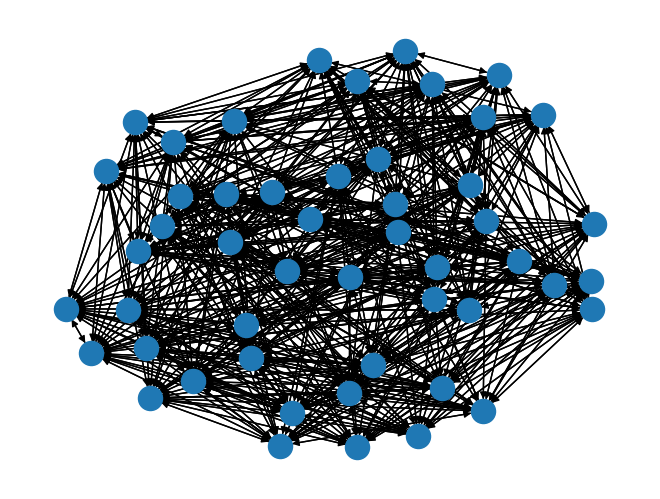

In [464]:
g = networkx.paley_graph(50)
networkx.draw(g)

In [4]:
import sys
sys.path.append('/tmp/pycharm_project_361/')
import silearn

In [5]:
import silearn.utils.external
import numpy as np
import importlib

In [6]:
importlib.reload(silearn.utils.data)

<module 'silearn.utils.data' from '/tmp/pycharm_project_361/sim/utils/data.py'>

In [465]:
edges = torch.tensor(np.array(g.edges))
weight = torch.rand_like(edges[:, 0], dtype=torch.float)
weight = torch.ones_like(edges[:, 0], dtype=torch.float)

In [165]:
edges, weight

(tensor([[ 0,  1],
         [ 0,  2],
         [ 0,  3],
         [ 0,  4],
         [ 0,  6],
         [ 0,  7],
         [ 0,  8],
         [ 0,  9],
         [ 0, 10],
         [ 0, 12],
         [ 0, 13],
         [ 0, 14],
         [ 0, 15],
         [ 0, 16],
         [ 0, 20],
         [ 0, 27],
         [ 0, 30],
         [ 0, 31],
         [ 0, 36],
         [ 0, 44],
         [ 0, 45],
         [ 0, 47],
         [ 1, 19],
         [ 1, 42],
         [ 2,  3],
         [ 2,  4],
         [ 2,  5],
         [ 2, 11],
         [ 2, 15],
         [ 2, 22],
         [ 2, 24],
         [ 2, 32],
         [ 2, 35],
         [ 2, 42],
         [ 4,  5],
         [ 4,  8],
         [ 4,  9],
         [ 4, 11],
         [ 4, 18],
         [ 4, 33],
         [ 4, 36],
         [ 4, 37],
         [ 4, 49],
         [ 5,  6],
         [ 5,  7],
         [ 5, 10],
         [ 5, 12],
         [ 5, 17],
         [ 5, 20],
         [ 5, 25],
         [ 5, 28],
         [ 5, 30],
         [ 5

In [9]:
silearn.backends.functional.__function_map__

{(<function silearn.backends.functional.scatter_sum(tensor, idx, clip_length=0)>,
  'torch'): <function silearn.backends.torch_ops.matrix_ops.scatter_sum(b: torch.Tensor, a: torch.LongTensor, clip_length=0)>,
 (<function silearn.backends.functional.scatter_cnt(idx, clip_length=0)>,
  'torch'): <function silearn.backends.torch_ops.matrix_ops.scatter_cnt(a: torch.LongTensor, dtype=torch.float32, clip_length=0)>,
 (<function silearn.backends.functional.entropy(p, q)>,
  'torch'): <function silearn.backends.torch_ops.matrix_ops.entropy(p: torch.Tensor, q: torch.Tensor)>,
 (<function silearn.backends.functional.uncertainty(p)>,
  'torch'): <function silearn.backends.torch_ops.matrix_ops.uncertainty(q: torch.Tensor)>,
 (<function silearn.backends.functional.scatter_max(tensor, idx)>,
  'torch'): <function torch_scatter.scatter.scatter_max(src: torch.Tensor, index: torch.Tensor, dim: int = -1, out: Optional[torch.Tensor] = None, dim_size: Optional[int] = None) -> Tuple[torch.Tensor, torch.Ten

In [10]:
import silearn.model.enc.encoding_tree
importlib.reload(silearn.model.enc.encoding_tree)

<module 'silearn.model.enc.encoding_tree' from '/tmp/pycharm_project_361/sim/model/enc/encoding_tree.py'>

In [466]:
gsim = silearn.utils.data.GraphSparse(edges, weight / weight.sum())
gsilearn._dist = silearn.scatter_sum(weight.float(), edges[:, 1])
gsilearn._dist /= gsilearn._dist.sum()
enc0 = silearn.model.enc.encoding_tree.Partitioning(gsim, torch.arange(gsilearn.n_vertices) * 0 )

In [266]:
enc0.structural_entropy(reduction="sum")

tensor(3.3219)

In [467]:

from silearn.optimizer.enc.partitioning.fast_merging import FastMergeSEM
importlib.reload(silearn.optimizer.enc.partitioning.fast_merging)
optim = FastMergeSEM()
optim.partition = enc0

In [438]:
gsilearn.edges[0][-5]

tensor([8, 9])

In [504]:
optim.iterative_merge(max_iteration = 1000, sample_ratio=0.5, p = 0.2, m_scale=0.0)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 25, 22, 25, 25, 25, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 37, 37, 35, 36, 37, 37, 38, 39, 39])
tensor([ 0,  1, 19, 19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 19,
        14, 15, 19, 16, 19, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 19, 31, 19])
tensor([ 0, 15,  1,  2, 15, 15,  3,  4,  5,  6, 15,  7,  8,  9, 10, 11, 12, 13,
        14, 15, 15, 16, 17, 18, 19, 15, 20, 21, 22, 23, 24, 15])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 19, 12, 13, 14, 15, 16,
        17, 18,  1,  5, 19,  1,  2])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 15,  9,  2, 10,  2, 11, 12, 13,  5,
        14, 15])
tensor([ 0,  1,  1,  2,  3,  1,  4,  5,  1,  6,  7,  8,  9, 10, 11, 12])
tensor([0, 1, 2, 1, 3, 4, 5, 1, 6, 7, 1, 8, 9])
tensor([0, 1, 2, 3, 1, 1, 4, 5, 6, 7])
tensor([0, 0, 1, 2, 3, 0, 4, 5])
tensor([0, 1, 2, 3, 4, 4])
tensor([0, 

In [519]:
optim.process_c()
optim.partition.structural_entropy(reduction="sum")


tensor(4.9887)

In [435]:
optim.iterative_merge_c(max_iteration=100, sample_ratio=0.8, p = 0.1, m_scale=0)

tensor([0, 0, 1])
tensor([1.1111, 1.0000, 1.0000, 1.1111, 0.9000, 1.1111, 1.1111, 1.1111, 1.1111,
        1.1111, 0.9000, 1.1111, 1.1111, 1.0000, 1.0000, 1.1111, 0.9000, 1.1111,
        1.1111, 0.9000, 1.0000, 1.0000, 1.1111, 1.1111, 1.1111, 0.9000, 1.1111,
        1.1111, 0.9000, 1.1111, 0.9000, 1.0000, 1.0000, 0.9000, 1.1111, 0.9000,
        1.1111, 1.1111, 0.9000, 1.1111, 1.0000, 0.9000, 1.0000, 1.1111, 0.9000,
        1.1111, 1.0000, 1.1111, 1.1111, 0.9000])
tensor(2.6804)
tensor([0, 0, 1])
tensor([1.1111, 0.9000, 1.1111, 1.2346, 0.8100, 1.2346, 1.2346, 1.2346, 1.2346,
        1.2346, 0.8100, 1.2346, 1.2346, 0.9000, 1.1111, 1.2346, 0.8100, 1.2346,
        1.1111, 0.9000, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 0.8100, 1.2346,
        1.2346, 0.8100, 1.2346, 0.8100, 1.1111, 1.1111, 0.9000, 1.2346, 0.8100,
        1.1111, 1.1111, 0.9000, 1.2346, 1.1111, 0.8100, 1.1111, 1.1111, 0.8100,
        1.2346, 0.9000, 1.2346, 1.2346, 0.8100])
tensor(2.6804)
tensor([0, 0, 1])
tensor([1.2346, 0.

In [470]:
# optim.process_fast(p=.6)
cug = silearn.utils.external.create_cugraph(es=edges[:, 0], et = edges[:, 1], w= weight)

In [514]:
import cugraph
par = cugraph.community.leiden(cug, resolution=1.0, max_iter=200)[0]["partition"].values

In [516]:
optim.partition.node_id = torch.tensor(par).long()

In [509]:
par


array([2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1,
       2, 0, 0, 1, 2, 2], dtype=int32)

In [183]:
FastMergeSEM.get_edge_transform(optim.partition.node_id[optim.partition.graph.edges[0]])

tensor([16, 15, 15, 17, 14, 14, 17, 17, 13, 14, 15, 14, 15, 13, 14, 16, 14, 16,
        17, 13, 16, 17, 11, 11,  7,  9,  6,  7,  7,  6,  5,  7,  7,  8, 14, 17,
        17, 15, 15, 17, 17, 15, 14,  2,  2,  1,  2,  1,  2,  2,  4,  2,  3,  1,
         2,  2,  2,  4,  2,  3,  2,  2, 16,  0,  7,  8,  8,  7,  7,  2,  5,  0,
         0,  0,  0,  0,  0,  0,  7, 11, 10, 11, 12, 11, 10,  2,  2, 11,  2, 11,
         7, 17, 11, 11,  2,  2])

In [517]:
# optim.partition.node_id = torch.tensor([2,0,0,1,1,2,0,0,1,1])

# optim.partition.node_id[optim.partition.graph.edges[0]]

# edges, trans_prob = optim.partition.graph.edges
# silearn.scatter_sum(trans_prob, optim.partition.node_id[edges[:,1]]).reshape(-1)
# optim.process_fast(re_compute=False)
# optim.process_fast(p = 0.2, m_scale=-8)
# optim.process_fast(p = 0.1, m_scale=-0.5)
# optim.process_fast(m_scale=-0.5, p=.1)
# optim.process_fast(p = 0.1, m_scale=0, re_compute=False)
optim.partition.structural_entropy(reduction="sum")

tensor(5.0469)

In [330]:
e, t = gsilearn.edges
silearn.scatter_sum(t, e[:,1]).reshape(-1)

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])

In [353]:
optim._log2m

tensor(1.)

In [520]:
optim.partition.node_id

tensor([0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2,
        2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
        2, 2])

In [505]:
npid = optim.partition.node_id.numpy(force=True)
for i in range(npid.shape[0]):
    g._node[i]["label"] = npid[i]

In [188]:
spt = torch.sparse_coo_tensor(edges.T, weight)
pos = np.ones((25, 2))
pos[:, 0] = torch.linalg.eig(spt.to_dense())[1][0].numpy()
pos[:, 1] = torch.linalg.eig(spt.to_dense())[1][1].numpy()

RuntimeError: linalg.eig: A must be batches of square matrices, but they are 49 by 50 matrices

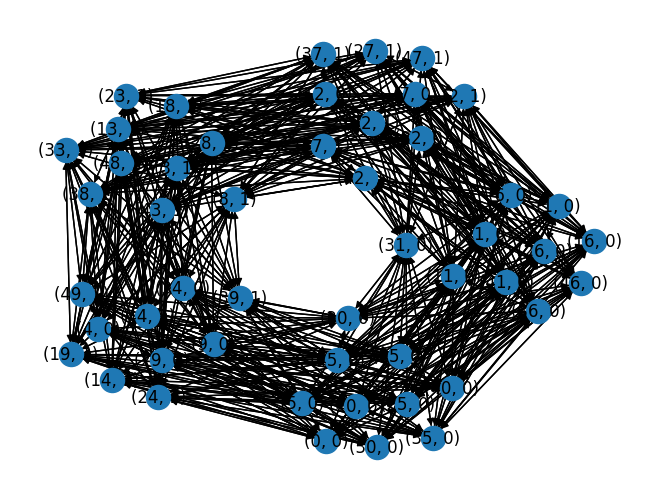

In [506]:
labels = networkx.get_node_attributes(g, "label")
networkx.draw(g, with_labels=True, labels = {k: (k, i) for k, i in labels.items()})
